# Regression Analysis

## Loading the Housing dataset into a data frame

Attributes:
    
<pre>
1. CRIM      도시별 인구 당 범죄 발생 건수
2. ZN        25,000 ft^2 이상의 주택 면적의 비용
3. INDUS     마을 당 비소매 영업 비율
4. CHAS      찰스강이 근방에 있는가에 대한 더미 변수 (1이면 근처, 0이면 아님)
5. NOX       산화 질소 농도
6. RM        주거당 평균 객실 수
7. AGE       1940년 이전에 건설된 건물 중 소유자가 거주하는 비율
8. DIS       보스턴 5개 직장 구역과의 가중 거리
9. RAD       방사형 고속도로 접근 가능 지수
10. TAX      $10,000 자산 당 세금 비율
11. PTRATIO  도시별 선생 비율
12. B        1000(Bk - 0.63)^2, Bk:흑인 비율
13. LSTAT    % lower status of the population
14. MEDV     소유자가 거주하는 주택의 중앙값 (단위 $1000)
</pre>

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('./csv/housing2.csv')

df.head()

,CRIM,AN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
len(df)

506

<br>
<br>

In [3]:
import matplotlib.pyplot as plt
#seaborn : 통계 데이터 시각화 도구
import seaborn as sns

In [4]:
data_x = df.drop(['MEDV','CRIM','INDUS','CHAS','NOX','AGE','RAD','LSTAT','B'],axis=1)
# 독립변수 5개를 제외한 모든 변수들은 제거
data_y = df['MEDV'].to_numpy()


In [5]:
data_x

,AN,RM,DIS,TAX,PTRATIO
0,18.0,6.575,4.0900,296,15.3
1,0.0,6.421,4.9671,242,17.8
2,0.0,7.185,4.9671,242,17.8
3,0.0,6.998,6.0622,222,18.7
4,0.0,7.147,6.0622,222,18.7
...,...,...,...,...,...
501,0.0,6.593,2.4786,273,21.0
502,0.0,6.120,2.2875,273,21.0
503,0.0,6.976,2.1675,273,21.0
504,0.0,6.794,2.3889,273,21.0


In [6]:
 data_y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_x, data_y, test_size=0.2, random_state=1)

In [8]:
x = X_train.to_numpy()

In [9]:
xtx = np.matmul(x.T , x)
#X_transpose * X

In [10]:
xtx_inv = np.linalg.inv(xtx)
#(X_transpose * X)^-1

In [11]:
W = np.matmul(np.matmul(xtx_inv , x.T), y_train)
#(X_transpose * X)^-1 * X_transpose * Y = W_hat
W

array([ 0.05125531,  6.78819152, -0.44856291, -0.01339154, -0.7328202 ])

In [12]:
#Calculate SSE 
X_train

,AN,RM,DIS,TAX,PTRATIO
42,0.0,6.169,5.7209,233,17.9
58,25.0,6.145,7.8148,284,19.7
385,0.0,5.277,1.4261,666,20.2
78,0.0,6.232,5.0141,398,18.7
424,0.0,5.565,2.0635,666,20.2
...,...,...,...,...,...
255,80.0,5.876,9.2203,315,16.4
72,0.0,6.065,5.2873,305,19.2
396,0.0,6.405,1.6768,666,20.2
235,0.0,6.086,3.6519,307,17.4


In [13]:
y_train

array([25.3, 23.3,  7.2, 21.2, 11.7, 27. , 29.6, 26.5, 43.5, 23.6, 11. ,
       33.4, 36. , 36.4, 19. , 20.2, 34.9, 50. , 19.3, 14.9, 26.6, 19.9,
       24.8, 21.2, 23.9, 20.6, 23.1, 28. , 20. , 23.1, 25. ,  9.7, 23.9,
       36.1, 13.4, 12.7, 39.8, 10.4, 20.6, 17.8, 19.5, 23.7, 28.5, 24.3,
       23.8, 19.1, 28.4, 20.5, 33.8, 14.5, 20.4, 16. , 13.3, 30.8, 27.5,
       24.4, 24.4, 25.1, 43.8, 21.9, 26.2, 14.2, 20.8, 20.1, 23.1, 13.1,
       16.2, 24.8, 20.2, 22.5, 14.8, 28.7, 20.1, 23.4, 32. , 19.1, 50. ,
       20.9, 21.7, 22. , 17.2, 30.3, 12.3, 21.4, 20.5, 35.2, 19.6, 22. ,
       21.7, 14.1, 21.1, 15. , 11.9, 20. , 41.3, 18.7, 50. , 50. , 18.4,
       17.9, 28.1, 16.1, 17.2, 28.6, 23.6, 20.4, 19.6, 18.8, 22.6, 17.7,
       30.5, 18.2, 20.6, 24.4, 17.3, 13.3, 22.8, 20.5, 21.2, 18.8, 18.9,
       18.2, 23.1, 32.7, 24. , 10.2, 19.5, 33.1, 13.4, 15.2, 24.8, 24.3,
        9.5, 24.2, 18.5, 44. , 50. , 24.7, 21.5,  8.4, 21.8, 50. , 23.8,
       32.4, 24.4, 17.6, 29.8,  9.6, 16.7, 13.8, 32

In [14]:
predicted_y_train = np.matmul(X_train.to_numpy(), W)
#Y_hat = sigma(W_hat * X)
predicted_y_train

array([23.07245881, 21.2496341 , 11.45985548, 21.02129842, 13.12894063,
       25.45025273, 24.66782326, 24.29129148, 37.38259429, 26.23729272,
       17.44929611, 34.21280599, 36.89103745, 31.65682873, 20.6660781 ,
       15.83297592, 32.31639406, 43.19846142, 19.35100684, 20.82955906,
       27.15216191, 17.68157342, 27.8846193 , 20.47125071, 23.52766318,
       21.47252899, 20.53057693, 26.83638607, 20.75091474, 24.18276904,
       24.99917526,  9.66964053, 26.10326138, 32.54984489, 19.91452931,
       15.68693547, 35.85202883, 22.94299354, 19.05195771, 19.6177566 ,
       18.16581843, 26.57309084, 31.02796932, 20.56041714, 23.37761489,
       15.88829372, 26.51712226, 23.01382778, 35.91101011, 18.12237456,
       18.77091353, 20.48145105, 21.78808915, 29.4042599 , -0.2726073 ,
       27.03228738, 21.92213234, 26.28958383, 34.62901113, 35.02420816,
       24.80393487, 16.20726663, 13.74273414, 25.74909067, 26.94202536,
       18.96517324, 16.45511676, 23.95140467, 19.23306191, 19.96

In [15]:
residuals = (y_train- predicted_y_train)
residuals

array([ 2.22754119e+00,  2.05036590e+00, -4.25985548e+00,  1.78701582e-01,
       -1.42894063e+00,  1.54974727e+00,  4.93217674e+00,  2.20870852e+00,
        6.11740571e+00, -2.63729272e+00, -6.44929611e+00, -8.12805989e-01,
       -8.91037446e-01,  4.74317127e+00, -1.66607810e+00,  4.36702408e+00,
        2.58360594e+00,  6.80153858e+00, -5.10068379e-02, -5.92955906e+00,
       -5.52161912e-01,  2.21842658e+00, -3.08461930e+00,  7.28749290e-01,
        3.72336817e-01, -8.72528986e-01,  2.56942307e+00,  1.16361393e+00,
       -7.50914742e-01, -1.08276904e+00,  8.24741584e-04,  3.03594667e-02,
       -2.20326138e+00,  3.55015511e+00, -6.51452931e+00, -2.98693547e+00,
        3.94797117e+00, -1.25429935e+01,  1.54804229e+00, -1.81775660e+00,
        1.33418157e+00, -2.87309084e+00, -2.52796932e+00,  3.73958286e+00,
        4.22385109e-01,  3.21170628e+00,  1.88287774e+00, -2.51382778e+00,
       -2.11101011e+00, -3.62237456e+00,  1.62908647e+00, -4.48145105e+00,
       -8.48808915e+00,  

In [16]:
#MSE in training data

(residuals*residuals).mean()

34.05949988380178

In [17]:
#predict test data

predicted_y_test = np.matmul(X_test.to_numpy(), W)
predicted_y_test

array([30.29929363, 27.84905875, 22.14302992, 19.15653525, 11.73295038,
       20.82247853, 29.45989707, 19.84472084, 23.38617777, 25.51281772,
       20.6040801 , 28.72842566, 18.83610471, 24.10666047, 22.05912948,
       13.76994938, 20.80967755, 41.06637535, 27.81219613, 16.61412199,
       19.40213118, 21.35440263, 25.40727478, 23.22188947, 27.52112081,
       15.44486586, 20.19388076, 18.73873716, 38.05044163, 12.09145512,
       24.01605362, 17.19108223, 43.33767785, 17.7253083 , 20.92894474,
       19.85223952, 18.39276447, 29.1192664 ,  3.83934894, 16.19070812,
       22.5075159 , 22.13381608, 26.5942336 , 17.11757076, 17.28962314,
       21.79616146, 35.87683917, 15.44096391, 24.22125918, 21.80235826,
       22.5236762 , 25.35883849, 24.25213308, 25.78335137,  9.50363564,
       23.62509979, 15.32973738, 22.81804708, 19.25090327, 37.48183339,
       18.96352663, 26.15023731, 14.5573184 , 18.44893907, 17.78855992,
       30.48382495, 38.00911365, 24.28060133, 22.72665658, 22.48

In [18]:
y_test

array([28.2, 23.9, 16.6, 22. , 20.8, 23. , 27.9, 14.5, 21.5, 22.6, 23.7,
       31.2, 19.3, 19.4, 19.4, 27.9, 13.9, 50. , 24.1, 14.6, 16.2, 15.6,
       23.8, 25. , 23.5,  8.3, 13.5, 17.5, 43.1, 11.5, 24.1, 18.5, 50. ,
       12.6, 19.8, 24.5, 14.9, 36.2, 11.9, 19.1, 22.6, 20.7, 30.1, 13.3,
       14.6,  8.4, 50. , 12.7, 25. , 18.6, 29.8, 22.2, 28.7, 23.8,  8.1,
       22.2,  6.3, 22.1, 17.5, 48.3, 16.7, 26.6,  8.5, 14.5, 23.7, 37.2,
       41.7, 16.5, 21.7, 22.7, 23. , 10.5, 21.9, 21. , 20.4, 21.8, 50. ,
       22. , 23.3, 37.3, 18. , 19.2, 34.9, 13.4, 22.9, 22.5, 13. , 24.6,
       18.3, 18.1, 23.9, 50. , 13.6, 22.9, 10.9, 18.9, 22.4, 22.9, 44.8,
       21.7, 10.2, 15.4])

In [19]:
residuals_test = (y_test - predicted_y_test)

In [20]:
#MSE
(residuals_test*residuals_test).mean()

32.40554543855465

# Linear Regression with sklearn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#학습한 weight 확인
model.coef_

array([ 0.05130571,  6.65729993, -0.45549525, -0.01343138, -0.77343731])

# QUIZ

In [24]:
# 1. Student_Performance_new 데이터를 활용하여 x:math percentage, reading score percentage y:writing score percentage 로 설정하여 
#     regression model을 학습하시오 
# 2. Random하게 8:2로 데이터를 분할했을때, train 데이터에서의 MSE와 test 데이터에서의 MSE를 계산하시오 


In [3]:
df_s = pd.read_csv("./csv/Student_Performance_new.csv")

In [7]:
df_s.drop(["Unnamed: 0", "race/ethnicity", "parental level of education", "lunch", "test preparation course", "sex"], axis=1)

,math percentage,reading score percentage,writing score percentage
0,0.72,0.72,0.74
1,0.69,0.90,0.88
2,0.90,0.95,0.93
3,0.47,0.57,0.44
4,0.76,0.78,0.75
...,...,...,...
995,0.88,0.99,0.95
996,0.62,0.55,0.55
997,0.59,0.71,0.65
998,0.68,0.78,0.77


In [10]:
dX =  df_s.drop(["Unnamed: 0", "race/ethnicity", "parental level of education", "lunch", "test preparation course", "sex", "writing score percentage"], axis=1)
dY =  df_s["writing score percentage"].to_numpy()
dX, dY

(     math percentage  reading score percentage
 0               0.72                      0.72
 1               0.69                      0.90
 2               0.90                      0.95
 3               0.47                      0.57
 4               0.76                      0.78
 ..               ...                       ...
 995             0.88                      0.99
 996             0.62                      0.55
 997             0.59                      0.71
 998             0.68                      0.78
 999             0.77                      0.86
 
 [1000 rows x 2 columns],
 array([0.74, 0.88, 0.93, 0.44, 0.75, 0.78, 0.92, 0.39, 0.67, 0.5 , 0.52,
        0.43, 0.73, 0.7 , 0.58, 0.78, 0.86, 0.28, 0.46, 0.61, 0.63, 0.7 ,
        0.53, 0.73, 0.8 , 0.72, 0.55, 0.75, 0.65, 0.75, 0.74, 0.61, 0.65,
        0.38, 0.82, 0.79, 0.83, 0.59, 0.88, 0.57, 0.54, 0.68, 0.65, 0.66,
        0.54, 0.57, 0.62, 0.76, 0.76, 0.82, 0.48, 0.68, 0.42, 0.75, 0.87,
        0.43, 0.86, 0.49, 

In [11]:
from sklearn.model_selection import train_test_split

dX_train, dX_test, dY_train, dY_test = train_test_split(
    dX, dY, test_size=0.2, random_state=1)

In [19]:
x =  dX_train.to_numpy()
W_hat = np.matmul(x.T, x)
W_hat = np.linalg.inv(W_hat)
W_hat = np.matmul(np.matmul(W_hat, x.T), dY_train)
W_hat

array([0.05828208, 0.93067828])

In [22]:
Y_hat = np.matmul(dX_test, W_hat)
Y_hat, dY_test

(507    0.581155
 818    0.705058
 452    0.754506
 368    0.621278
 242    0.516591
          ...   
 430    0.651548
 874    0.602082
 550    0.753358
 608    0.631186
 207    0.791751
 Length: 200, dtype: float64,
 array([0.54, 0.68, 0.74, 0.58, 0.55, 0.51, 0.51, 0.36, 0.69, 0.82, 0.6 ,
        0.54, 0.67, 0.75, 0.69, 0.84, 0.9 , 0.92, 0.63, 0.52, 0.87, 0.84,
        0.73, 0.54, 0.5 , 0.65, 0.7 , 0.68, 0.65, 0.73, 0.48, 0.74, 0.47,
        0.68, 0.62, 0.76, 0.72, 0.59, 0.6 , 0.93, 0.78, 0.78, 0.74, 0.74,
        0.92, 0.89, 0.62, 0.68, 0.49, 0.95, 0.84, 0.82, 0.73, 0.79, 0.81,
        0.47, 0.8 , 0.76, 0.56, 1.  , 0.44, 0.51, 0.41, 0.57, 0.51, 0.67,
        0.62, 0.64, 0.47, 0.28, 0.58, 0.71, 0.83, 0.58, 0.48, 0.61, 0.79,
        0.53, 0.35, 0.74, 0.7 , 0.82, 0.52, 0.72, 0.83, 0.76, 0.91, 0.76,
        0.64, 0.43, 0.79, 0.87, 0.73, 0.81, 0.79, 0.5 , 0.62, 0.73, 0.78,
        0.61, 0.66, 0.7 , 0.82, 0.78, 0.53, 0.52, 0.77, 0.71, 0.67, 0.61,
        0.67, 0.44, 0.71, 0.1 , 0.72, 0.87,

In [18]:
res = Y_hat - dY_test
MSE = (res*res).mean()
MSE

0.002100585516764419

# Polynomial Regression 

In [29]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

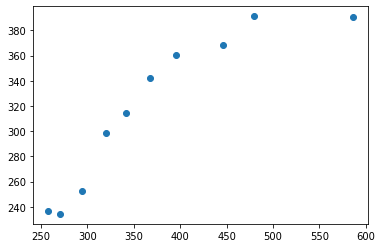

In [30]:
plt.scatter(X, y, label='training points')
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()

#다항 변수 생성 
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

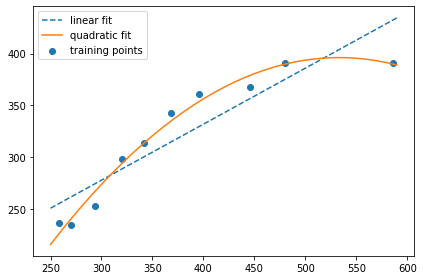

In [32]:
# fit linear features
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# fit quadratic features
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# plot results
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [33]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [36]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


## Modeling nonlinear relationships in the Housing Dataset


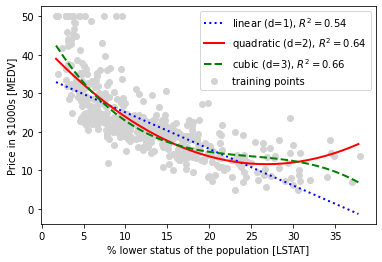

In [37]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

#plt.savefig('images/10_11.png', dpi=300)
plt.show()

# Model Complexity and Overfitting

In [38]:
from sklearn.model_selection import train_test_split

X, y = df[['LSTAT']].values, df['MEDV'].values

#stratify는 y의 class별 개수를 유지시킴 
X_train, X_test, y_train, y_test =    train_test_split(X, y,test_size=0.3, random_state=0)

In [39]:
def draw_nonlinear_lr(degree  = 2):
    regr = LinearRegression()

    # create quadratic features
    quadratic = PolynomialFeatures(degree=degree)
    X_train_poly = quadratic.fit_transform(X_train)
    X_test_poly = quadratic.fit_transform(X_test)

    # fit features
    X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

    regr = regr.fit(X_train_poly, y_train)
    y_lin_fit = regr.predict(quadratic.fit_transform(X_fit))
    train_linear_r2 = r2_score(y_train, regr.predict(X_train_poly))
    test_linear_r2 = r2_score(y_test, regr.predict(X_test_poly))

    plt.scatter(X_train, y_train, label='training points', color='lightgray')
    plt.scatter(X_test, y_test, label='test points', color='red', alpha=0.1)

    print('Train R2 :',train_linear_r2)
    print('Test R2 :',test_linear_r2)
    plt.plot(X_fit, y_lin_fit, 
             color='blue', 
             lw=2, 
             linestyle=':')
    plt.legend()
    plt.show()

Train R2 : 0.5524780757890007
Test R2 : 0.5218049526125568


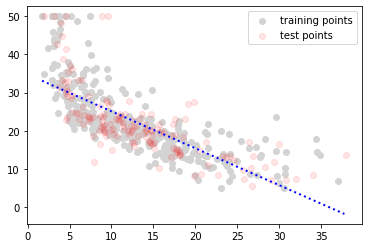

In [40]:
draw_nonlinear_lr(1)

Train R2 : 0.6578699575578193
Test R2 : 0.5964427754767516


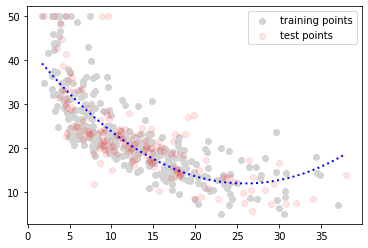

In [41]:
draw_nonlinear_lr(2)

Train R2 : 0.6944251073601581
Test R2 : 0.6415440639533017


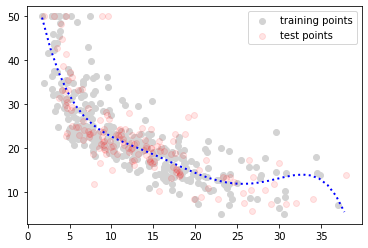

In [42]:
draw_nonlinear_lr(5)

Train R2 : 0.6977498296518165
Test R2 : 0.577139573079593


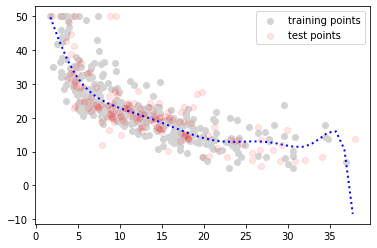

In [43]:
draw_nonlinear_lr(10)

# Using regularized methods for regression# 

In [44]:
from sklearn.linear_model import Lasso

from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

lasso = Lasso(alpha=10)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.          0.0310504  -0.          0.          0.          0.
  0.         -0.          0.         -0.01099723 -0.          0.00623475
 -0.55917947]


In [45]:
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 39.140, test: 43.048
R^2 train: 0.538, test: 0.483


In [46]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)

In [47]:

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)
print(ridge.coef_)

[-1.18308575e-01  4.61259764e-02 -2.08626416e-02  2.45868617e+00
 -8.25958494e+00  3.89748516e+00 -1.79140171e-02 -1.39737175e+00
  2.18432298e-01 -1.16338128e-02 -9.31711410e-01  7.26996266e-03
 -4.94046539e-01]


In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)
print(lasso.coef_)

[-0.06586193  0.04832933 -0.          0.         -0.          0.86898466
  0.01217999 -0.75109378  0.2000743  -0.01395062 -0.84602363  0.00668818
 -0.73266568]
